Visualizing the missing values:


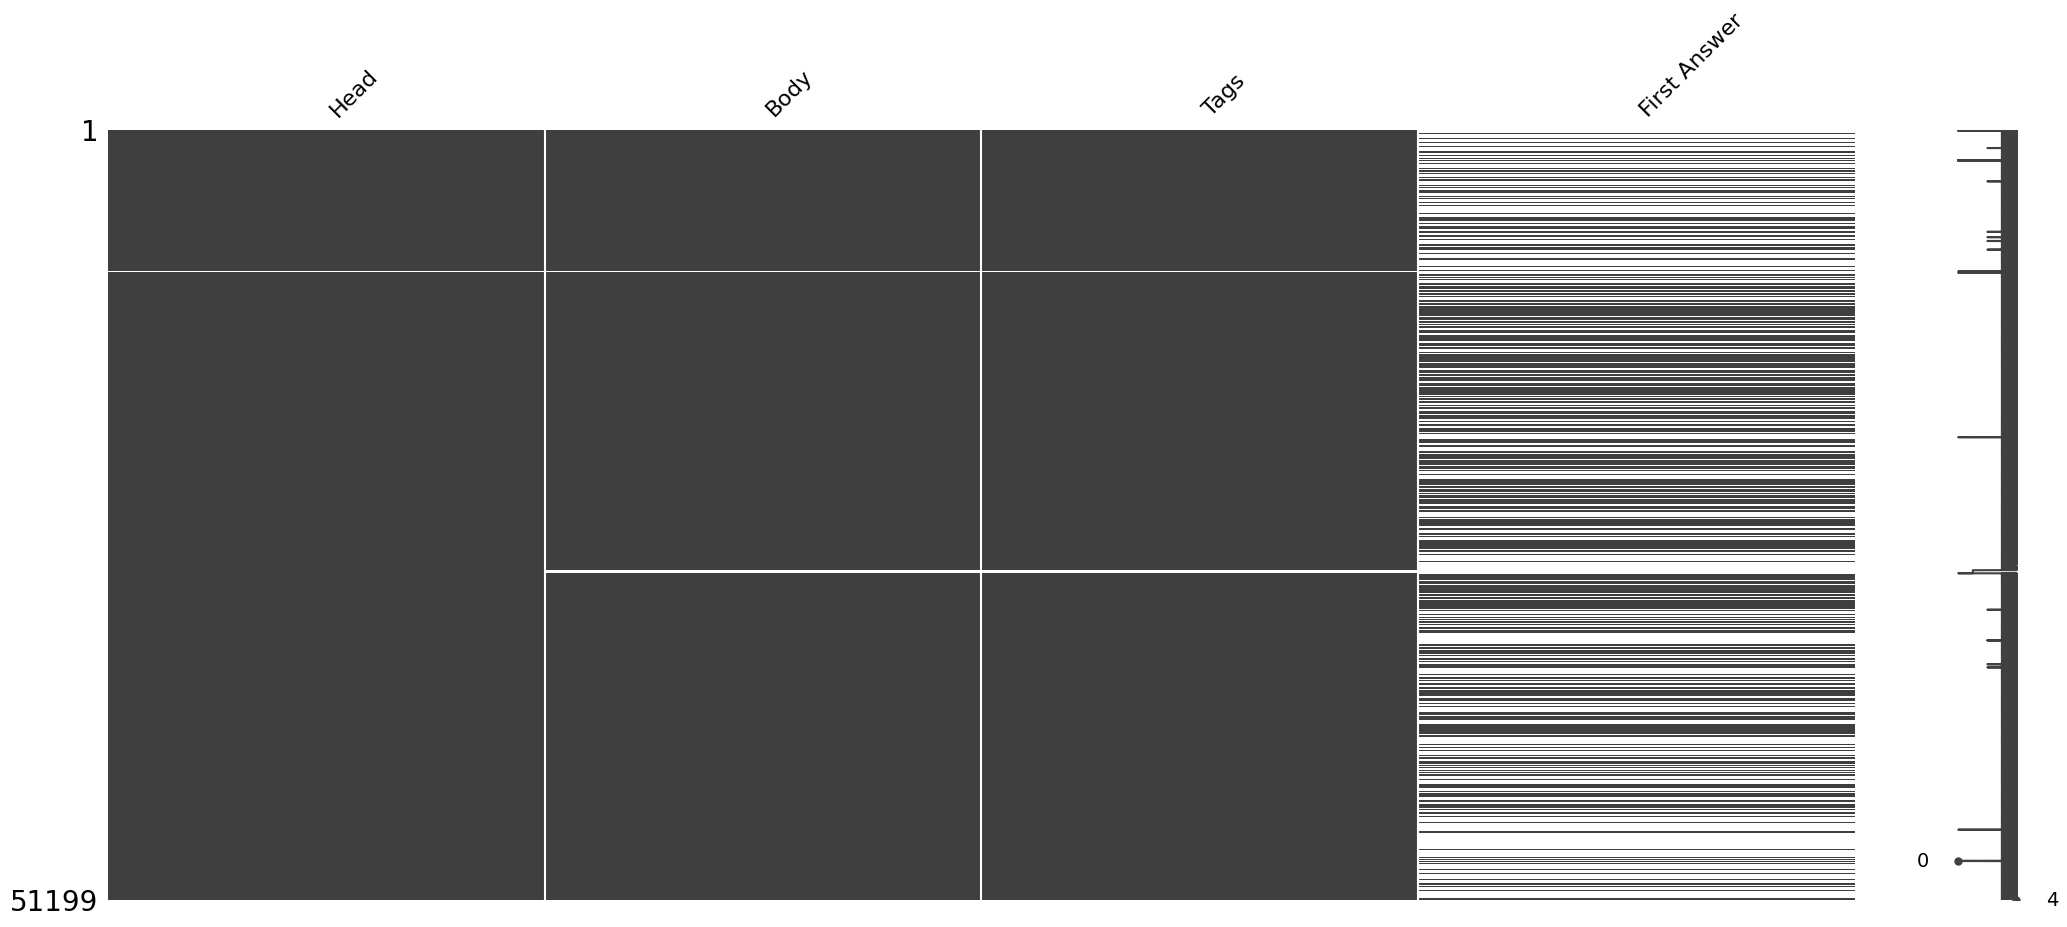

In [1]:
# Importing basic Libraries for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import regex as re
from ast import literal_eval
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 10)
df = pd.read_csv('Data/combined_df.csv')
df.isna().sum()

# We can see that the are some missing values in the dataset. First Answer features have 50% missing values.
# Without taking this column into consideration, we can see that there are 3 columns with missing values. now we will clean those features.

print('Visualizing the missing values:')
msno.matrix(df)

# We can se from the missing values distribution that both body and tags are common in the missing values.
# If we can drop these rows, we can get rid of most of the missing values without hampering the quality of the data, because we are doing a supervised learning task and we need the tags to be present.
df['First Answer'].fillna('No Answer', inplace=True)

# Dropping the rows with missing values in the body and tags columns and dropping the duplicates.
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


In [2]:
def clean_head(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    return text

df['Head'] = df['Head'].apply(clean_head)

In [ ]:

# Cleaning the text
def clean_text(text):
    text = text.strip()
    text = text.lower()
    text = re.sub(r'[\\].', '', text)
    text = re.sub(r'[^A-Za-z0-9\']', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df['Body'] = df['Body'].apply(clean_text)

In [ ]:
# Cleaning the tags
df['Tags Count'] = df['Tags'].apply(lambda x: len(literal_eval(x)))
df['Tags Count'].value_counts()
df['Tags'] = df['Tags'].apply(lambda x: " ".join(literal_eval(x)))

In [ ]:
df.to_csv('Data/cleaned_data.csv', index=False)

## Now our data is in a good shape, we can start to do some analysis on it.